In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

In [2]:
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)
    
    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    
    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
canc_norm = scaler.fit_transform(X_canc)

pca = PCA(n_components = 2).fit(canc_norm) 
canc_pca = pca.transform(canc_norm)

print('PCA 전 특성 수:', X_canc.shape[1])
print('PCA 후 특성 수:', canc_pca.shape[1])

PCA 전 특성 수: 30
PCA 후 특성 수: 2


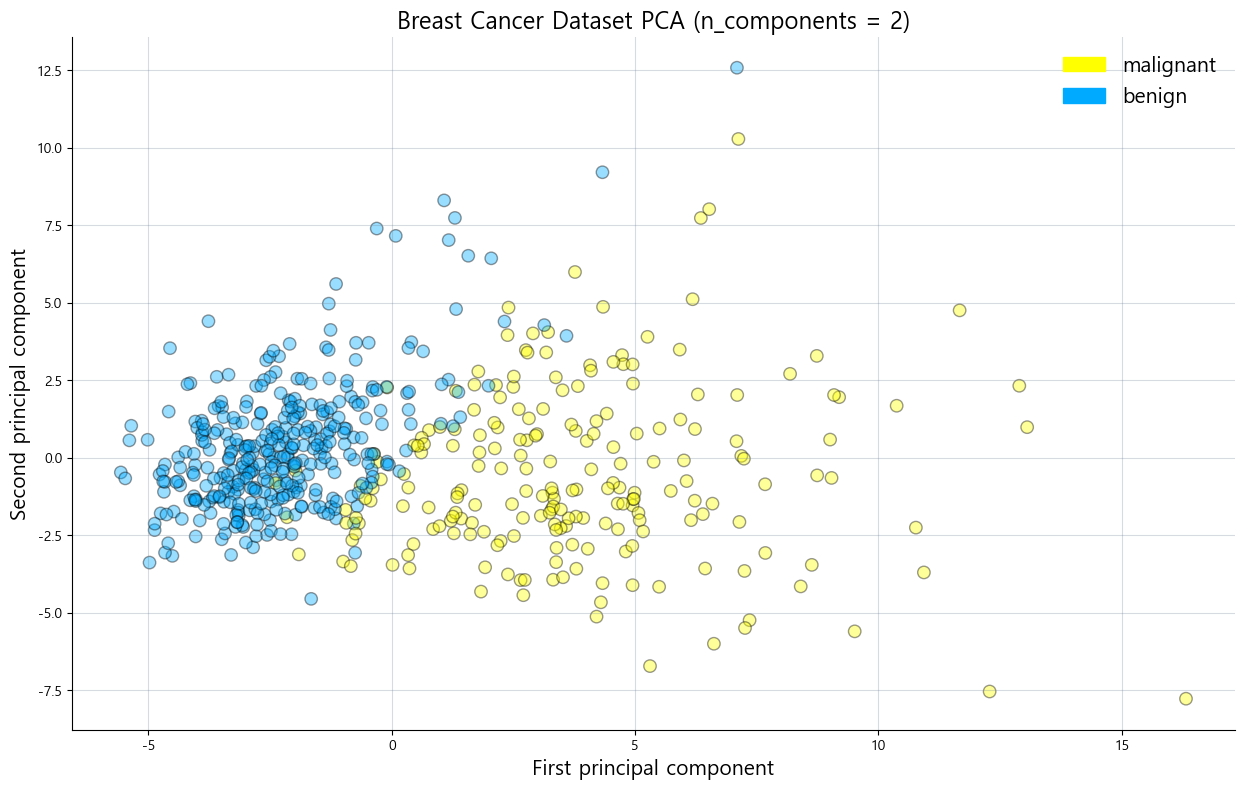

In [9]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

plt.show()

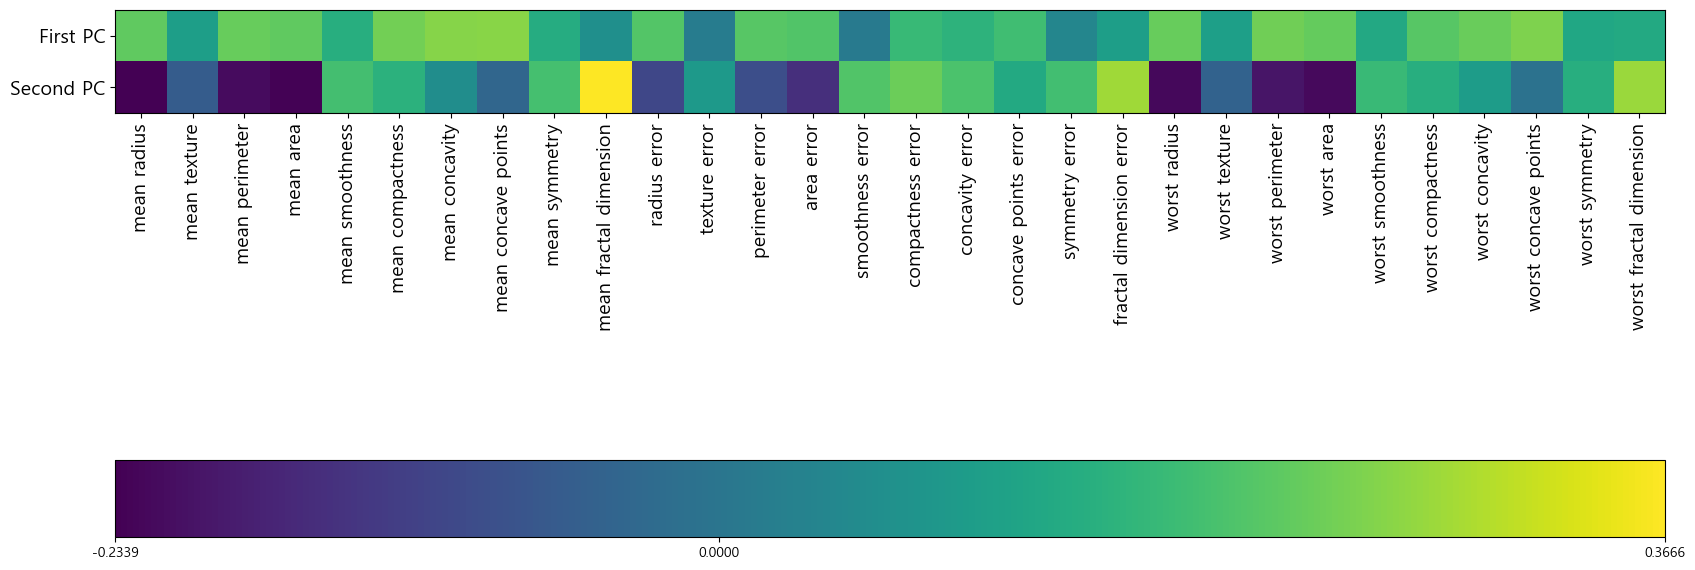

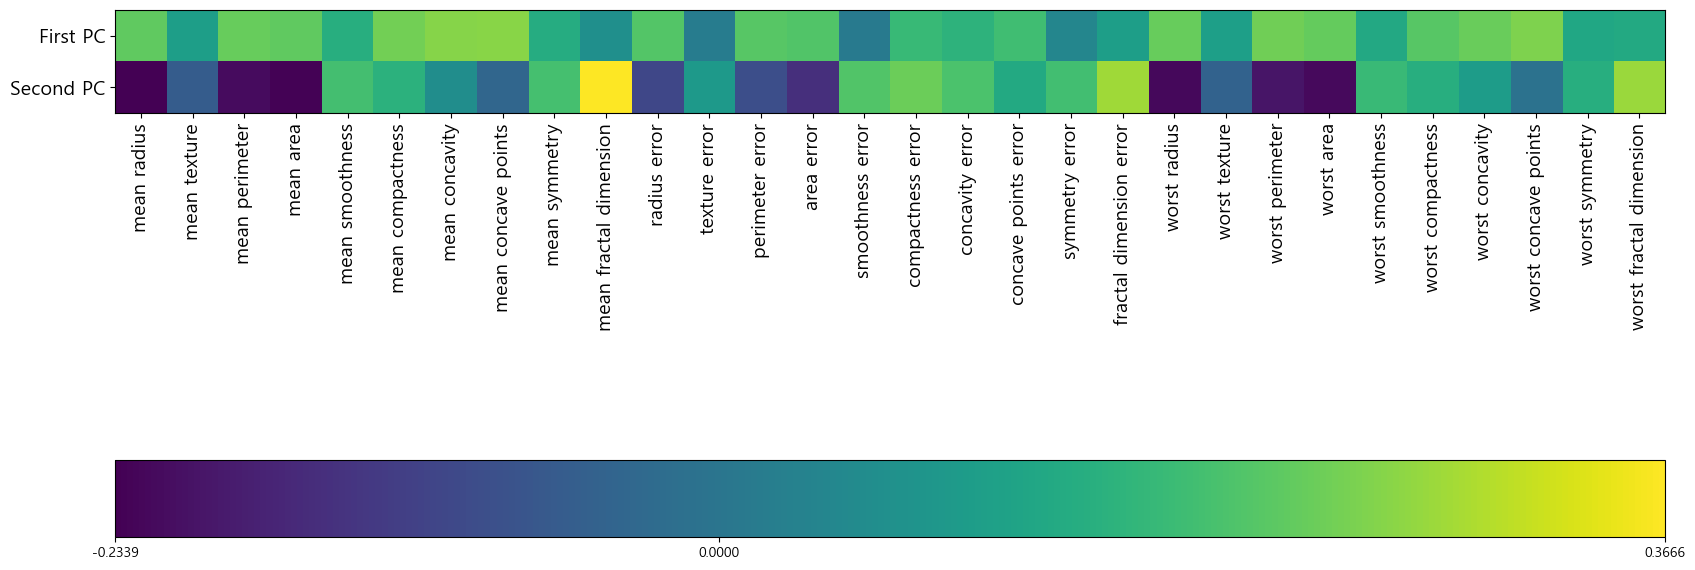

In [11]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.5);

plt.show()

C:\Users\minse\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


MDS 전 특성 수: 30
MDS 후 특성 수: 2


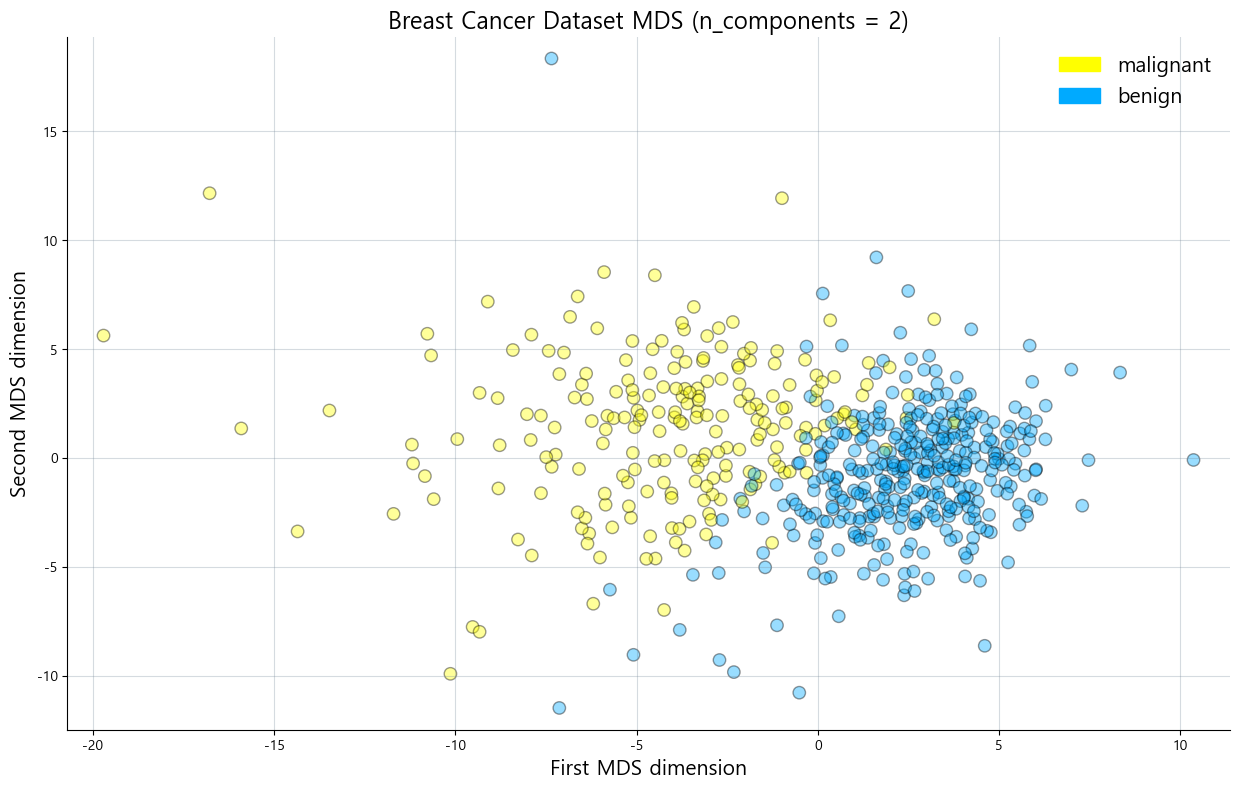

In [13]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('MDS 전 특성 수:', X_canc.shape[1])
print('MDS 후 특성 수:', canc_mds.shape[1])

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);

plt.show()

C:\Users\minse\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\minse\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\minse\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\minse\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


T-SNE 전 특성 수: 30
T-SNE 후 특성 수: 2


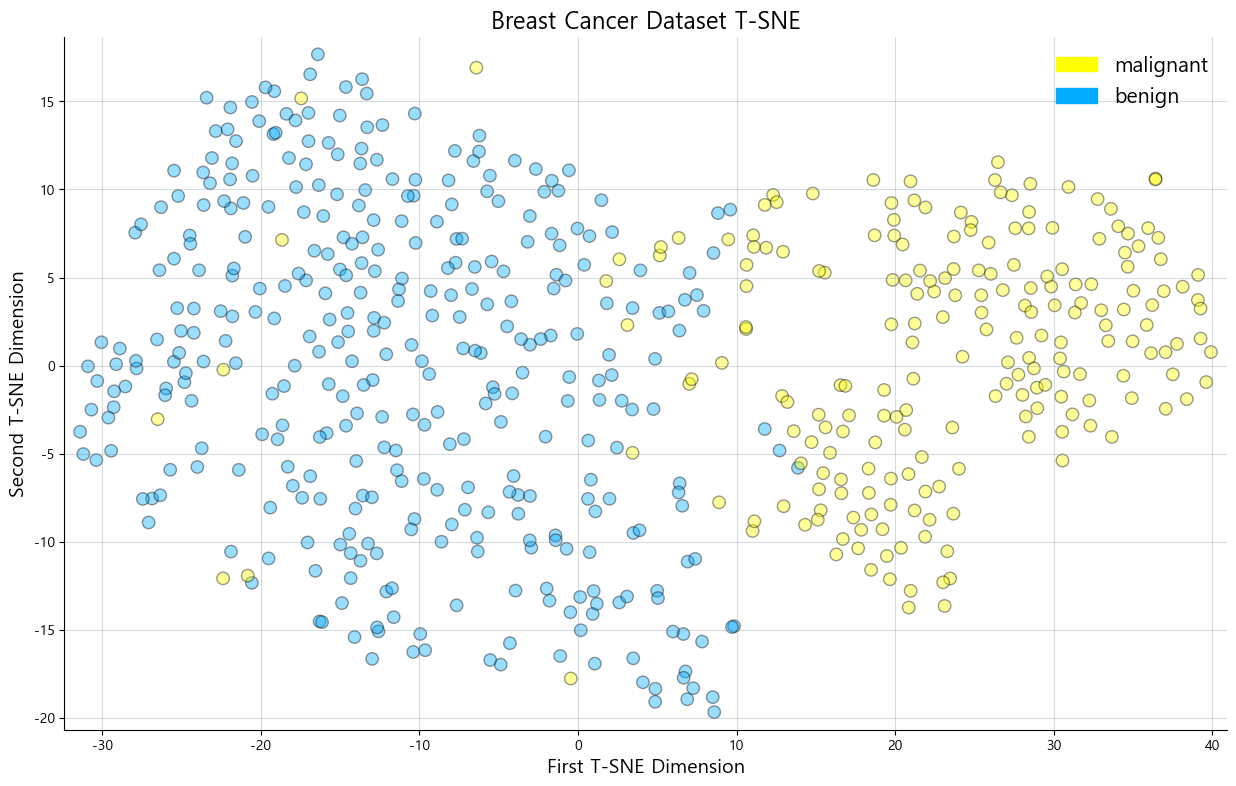

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('T-SNE 전 특성 수:', X_canc.shape[1])
print('T-SNE 후 특성 수:', canc_tsne.shape[1])

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

plt.show()